In [310]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
reload(vs)



<module 'helper_visa' from 'C:\\Users\\mathusla\\Documents\\MATHUSLA\\JupyterNotebooks\\Hardware\\Keysight\\..\\helper_visa.py'>

In [171]:
data_save=joblib.load("waveform_laser.joblib")
time_series = data_save["metadata"]["time_series"]*1e9

In [172]:
amp2eh = 0.0016760020731648394 # 2.5 mV/eh
trigger_threshold_edge = amp2eh*5.5


In [173]:
process_result = {}
for ch in [2]:
    process_result[f"trigger_time_edge_{ch}"]=[]
    process_result[f"trigger_time_cfd_{ch}"]=[]
    process_result[f"trigger_time_fit_{ch}"]=[]
    process_result[f"amplitude_{ch}"]=[]
    process_result[f"amplitude_fit_{ch}"]=[]
    process_result[f"trise_fit_{ch}"]=[]
    process_result[f"tfall_fit_{ch}"]=[]
    process_result[f"fit_chi2_{ch}"]=[]
    

for i in tqdm(range(len(data_save[2]))):
# for i in tqdm(range(1000)):
    for ch in [2]:
        x=time_series
        y=-data_save[ch][i]
        dt = (time_series[1]-time_series[0])
        
        

        # Edge trigger:
        trigger_time_edge = (np.argmax( y>trigger_threshold_edge)-2048)*dt
        amplitude = np.max(y)
    
    
        # # CFD trigger
        # leading_edges = hp.constant_fraction_discriminator(y, 0, trigger_threshold_edge, trigger_threshold_cfd, gauss_filter=8)
        # if len(leading_edges)>0:
        #     trigger_time_cfd = (leading_edges[0][1]-2048)*(time_series[1]-time_series[0])
        # else:
        #     trigger_time_cfd = -999
           
        # Fit
        try:
            popt, pcov, info, f = hp.fit_curve(hp.Pulse,x,y, p0=[np.max(y), x[np.argmax(y)], 3.5, 70], maxfev=1000, makeplot=False, color="C0", linestyle="--", label="CH1, $T_r$={popt[2]:.1f} ns, $T_f$={popt[3]:.1f} ns, ") 
            chi2=np.linalg.norm(info["fvec"])
        except KeyboardInterrupt:
            print("  KeyboardInterrupt. You pressed ctrl c...")
            break                
        except Exception as e: # Any other exception
            # print("  Exception:", str(e)) # Displays the exception without raising it
            popt = [-999, -999, -999, -999]
            chi2=-999
            
        trigger_time_fit = popt[1]
        
        process_result[f"trigger_time_edge_{ch}"].append(trigger_time_edge)
        # process_result[f"trigger_time_cfd_{ch}"].append(trigger_time_cfd)
        process_result[f"trigger_time_fit_{ch}"].append(trigger_time_fit)
        process_result[f"amplitude_{ch}"].append(amplitude)
        process_result[f"amplitude_fit_{ch}"].append(popt[0])
        process_result[f"trise_fit_{ch}"].append(popt[2])
        process_result[f"tfall_fit_{ch}"].append(popt[3])
        process_result[f"fit_chi2_{ch}"].append(chi2)        
        
for key in process_result:
    process_result[key]=np.array(process_result[key])        

  0%|                                                                                         | 0/7200 [00:00<?, ?it/s]C:\Users\mathusla\Documents\MATHUSLA\JupyterNotebooks\Hardware\Keysight\..\helper_basic.py:49: RuntimeWarning: divide by zero encountered in true_divide
  kernel_normed = kernel/np.max(kernel)
C:\Users\mathusla\Documents\MATHUSLA\JupyterNotebooks\Hardware\Keysight\..\helper_basic.py:49: RuntimeWarning: invalid value encountered in true_divide
  kernel_normed = kernel/np.max(kernel)
  0%|                                                                                 | 8/7200 [00:00<03:33, 33.72it/s]C:\Users\mathusla\Documents\MATHUSLA\JupyterNotebooks\Hardware\Keysight\..\helper_basic.py:48: RuntimeWarning: overflow encountered in exp
  kernel = (np.exp(-dx/tau1)-np.exp(-dx/tau2))/(tau1-tau2)*np.heaviside(dx,1)
  3%|██▎                                                                            | 210/7200 [00:05<03:15, 35.74it/s]C:\Users\mathusla\Documents\MATHUSLA\Jupy

Text(0, 0.5, 'Chi2')

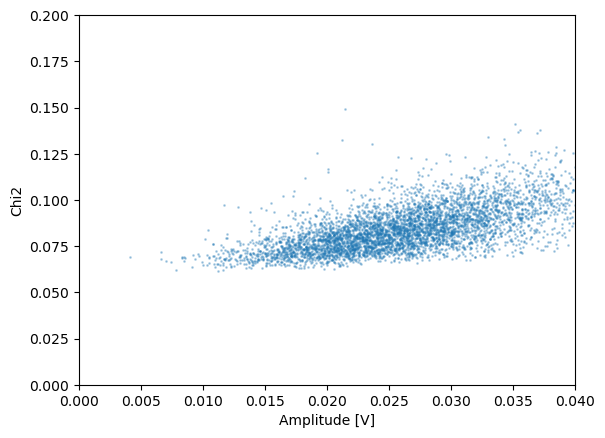

In [10]:
scatter(process_result[f"amplitude_fit_2"],process_result[f"fit_chi2_2"] , s=1, alpha=0.3);
xlim(0,0.04)
ylim(0,0.2)
xlabel("Amplitude [V]")
ylabel("Chi2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


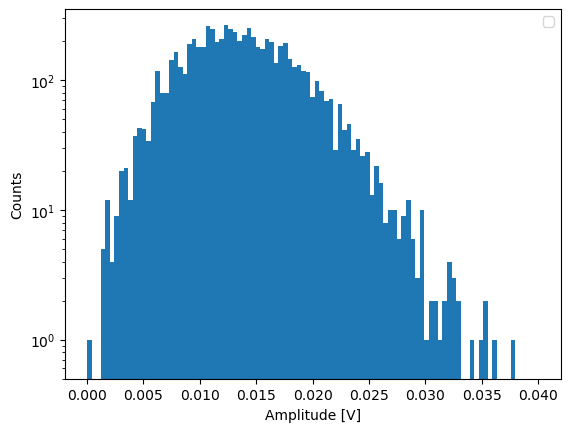

In [174]:
h=hist(process_result[f"amplitude_fit_2"], bins=np.linspace(0,0.04,100));

# popt, pcov, info, f = hp.fit_hist("gauss", h, label="mean ={popt[1]*100:.2f} mV", color="C1", linestyle="--", fit_range=(0.001,0.002));


legend()
xlabel("Amplitude [V]")
ylabel("Counts")
yscale("log")
ylim(0.5,)
legend()

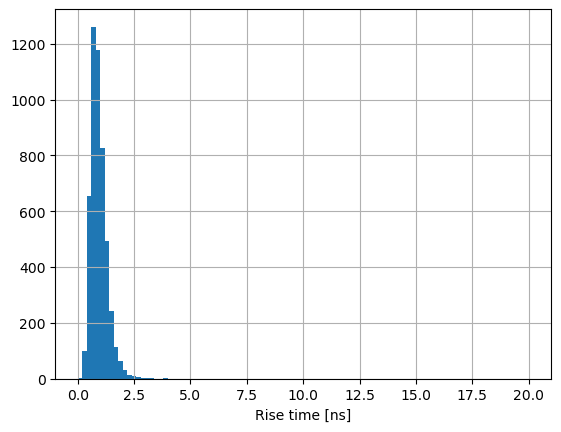

Text(0, 0.5, 'Rise time [ns]')

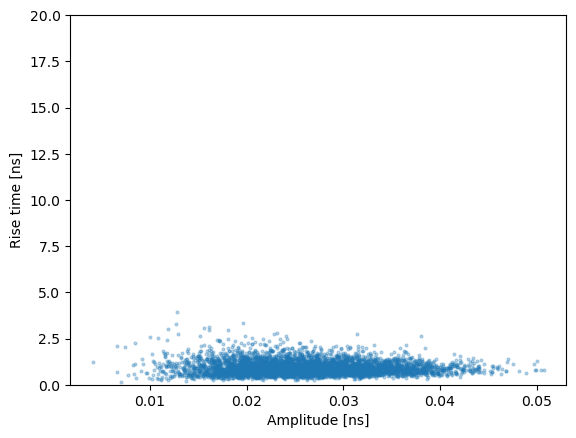

In [14]:
hist(process_result[f"trise_fit_2"],bins=100, range=(0,20));
xlabel("Rise time [ns]")
grid()
np.median(process_result[f"trise_fit_2"])
show()

scatter(process_result[f"amplitude_fit_2"], process_result[f"trise_fit_2"],s=4,alpha=0.3);
ylim(0,20)
xlabel("Amplitude [ns]")
ylabel("Rise time [ns]")


In [175]:
time_series = data_save["metadata"]["time_series"]

0.0009815268


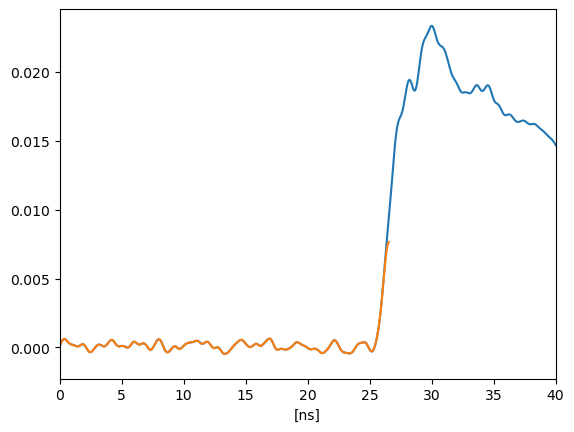

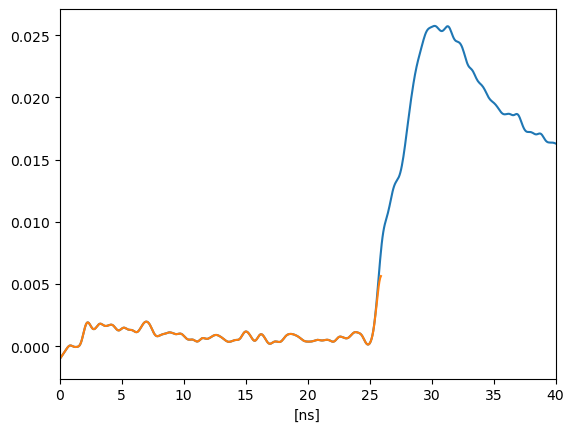

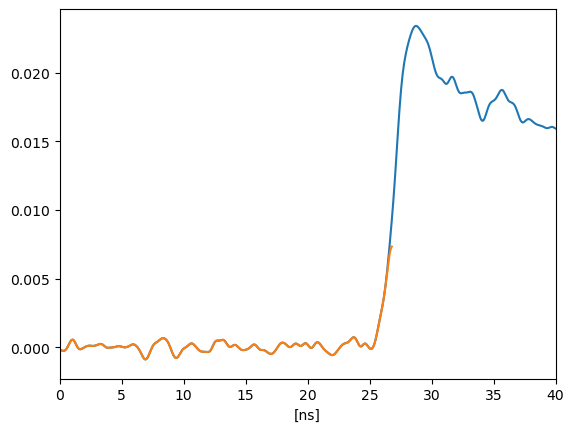

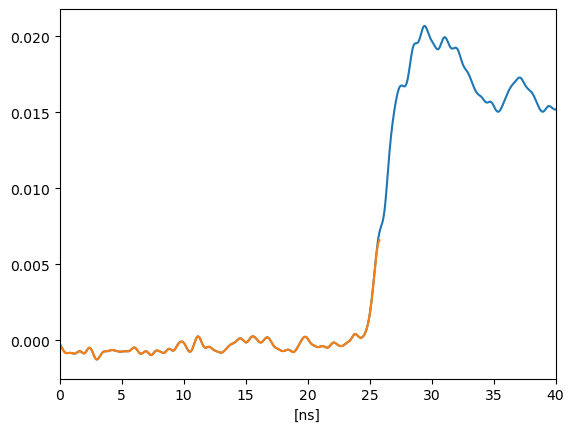

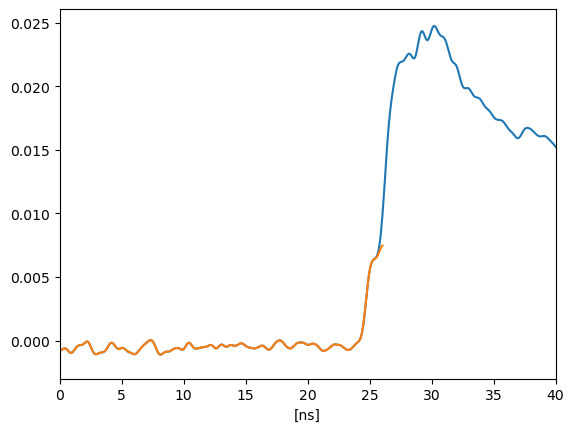

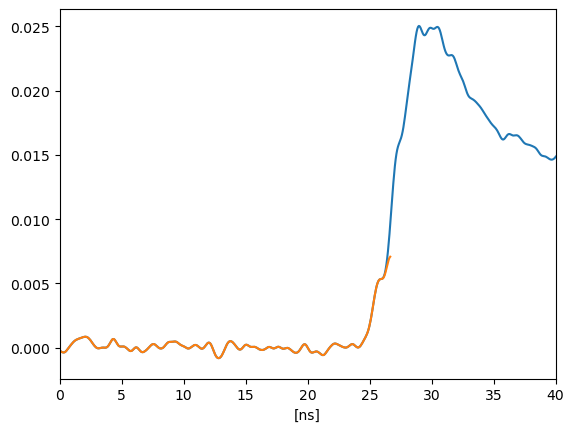

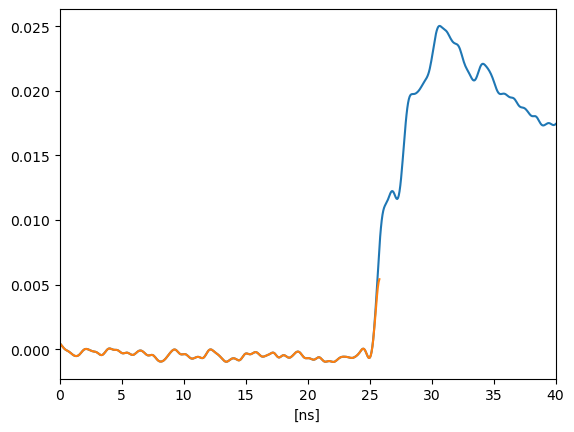

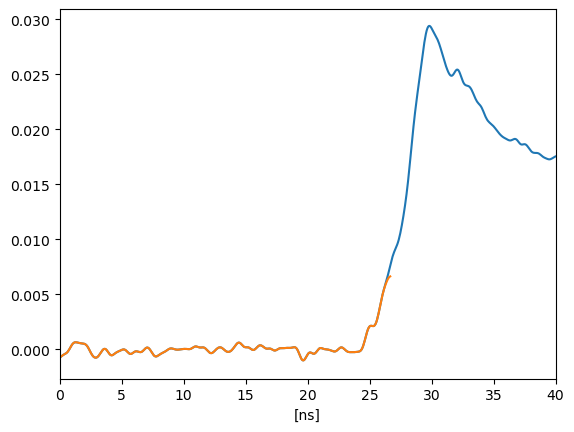

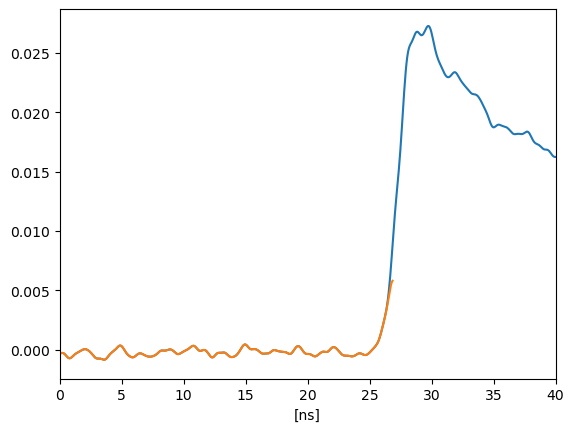

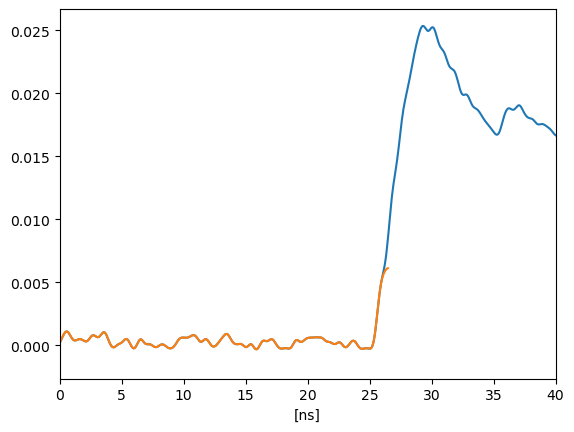

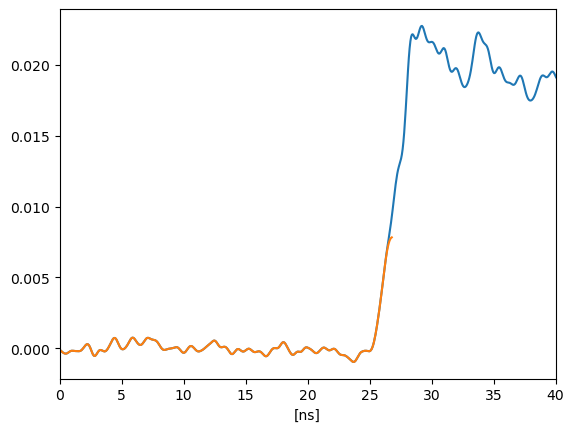

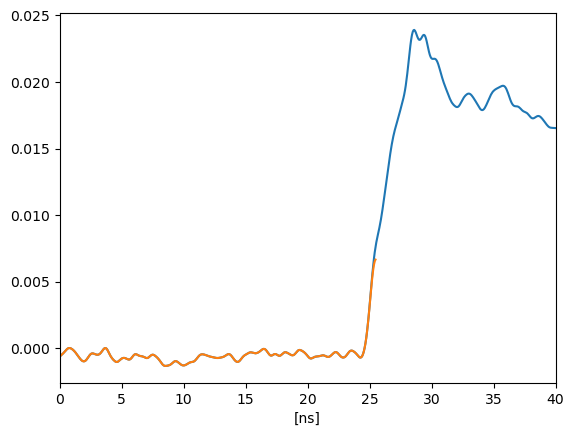

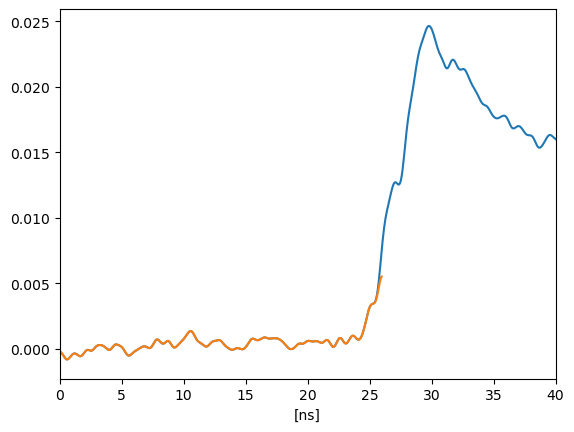

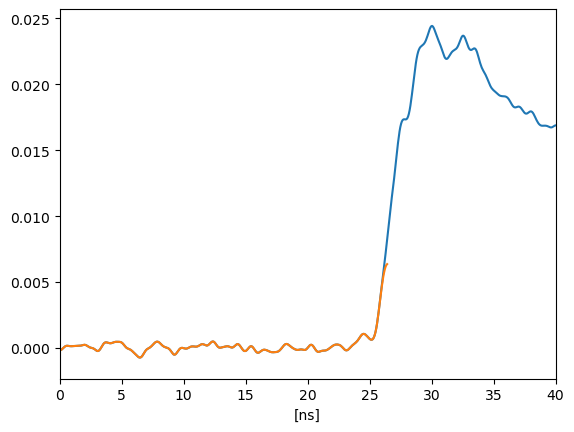

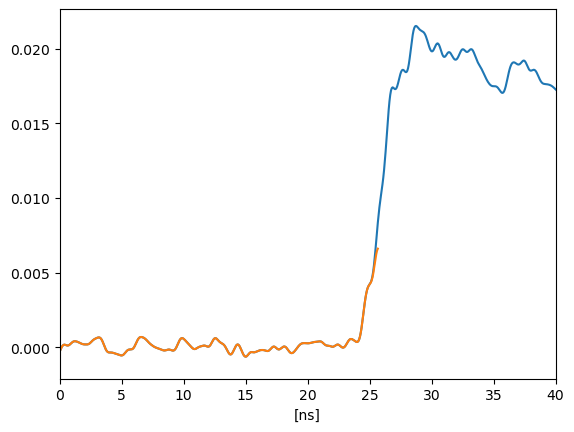

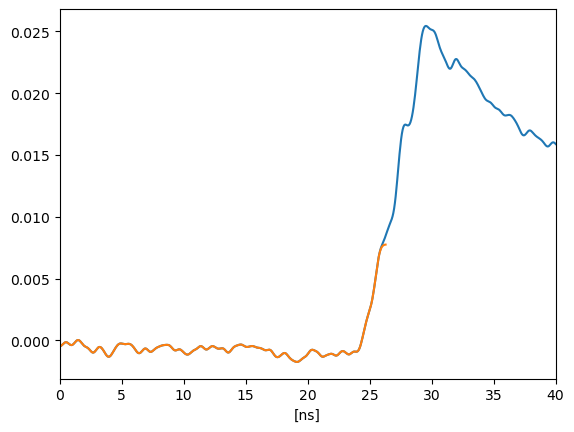

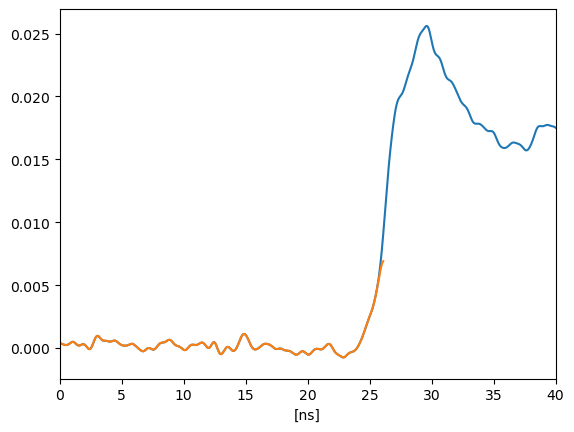

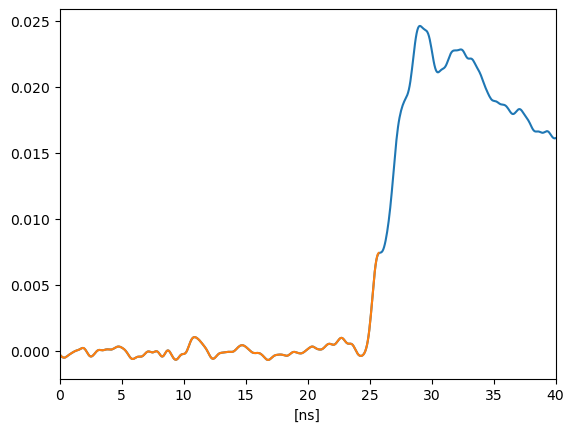

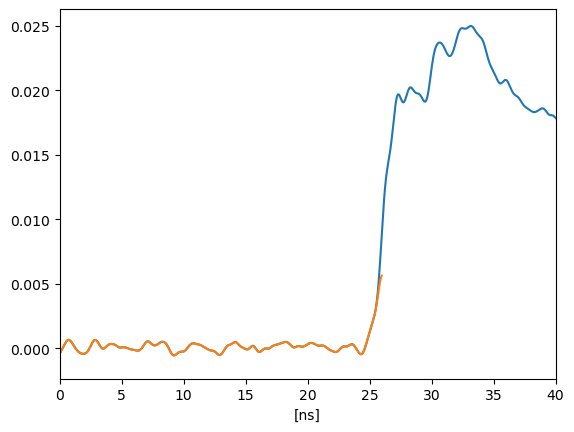

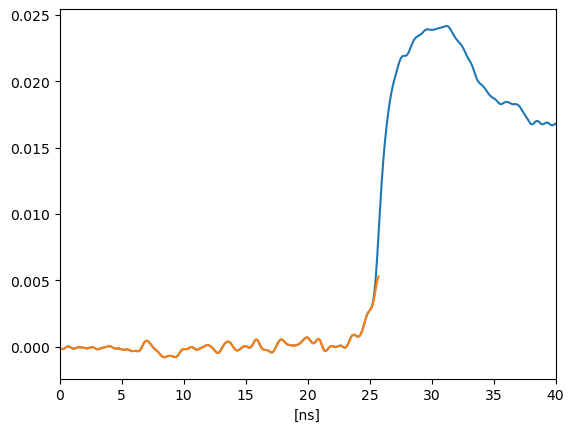

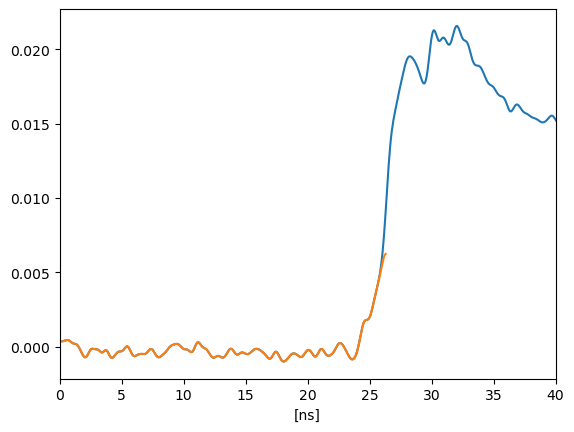

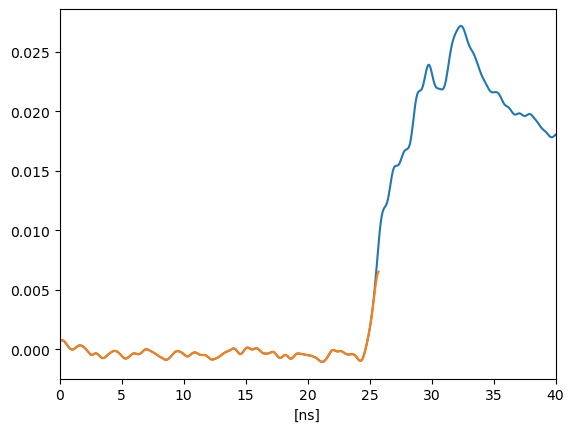

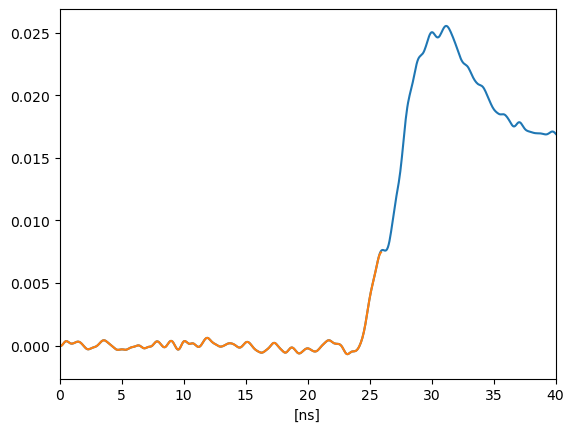

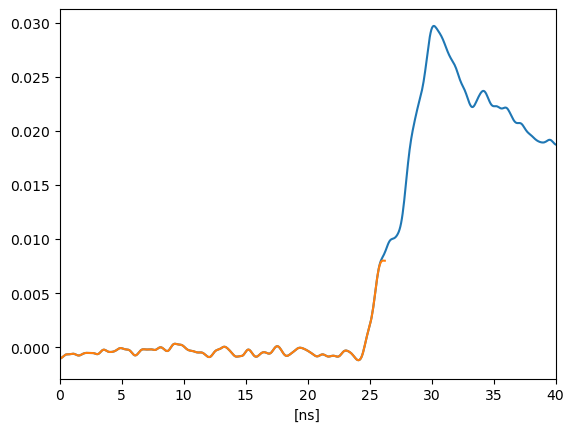

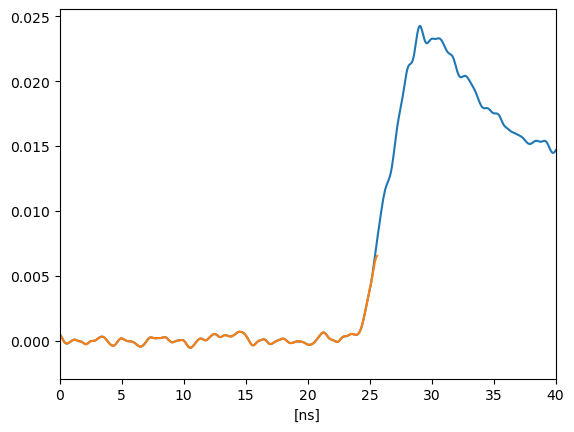

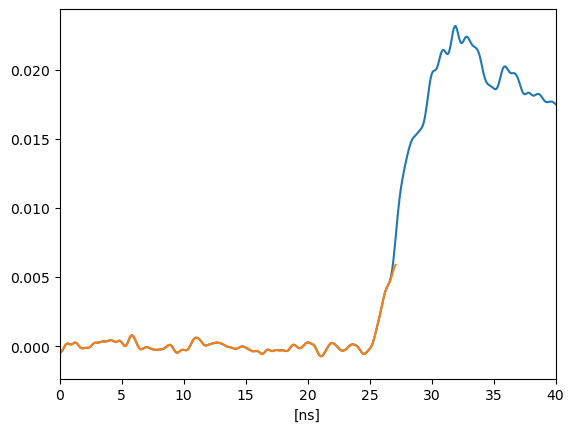

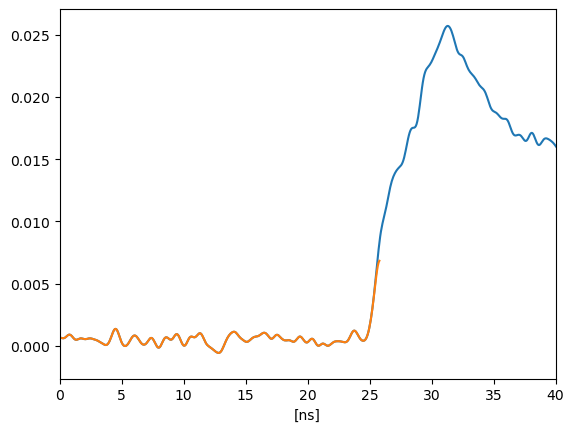

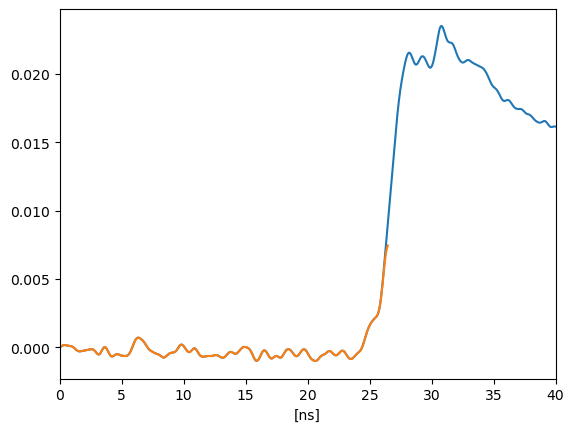

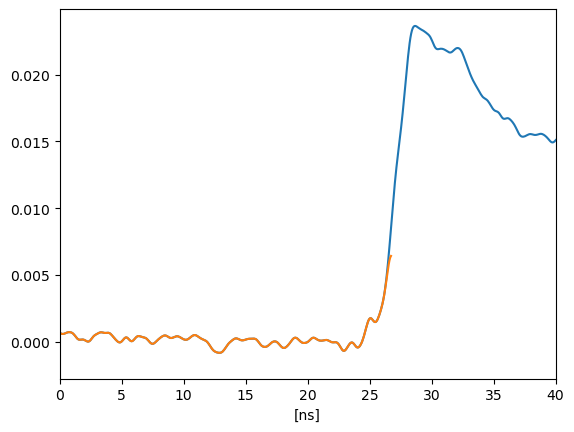

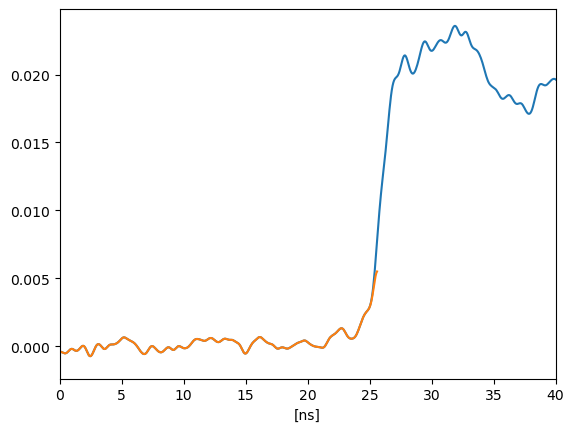

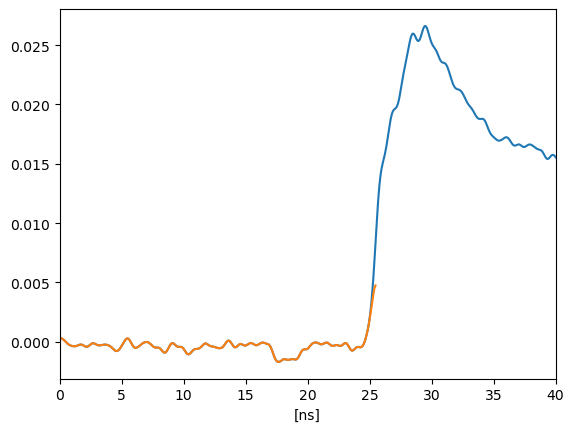

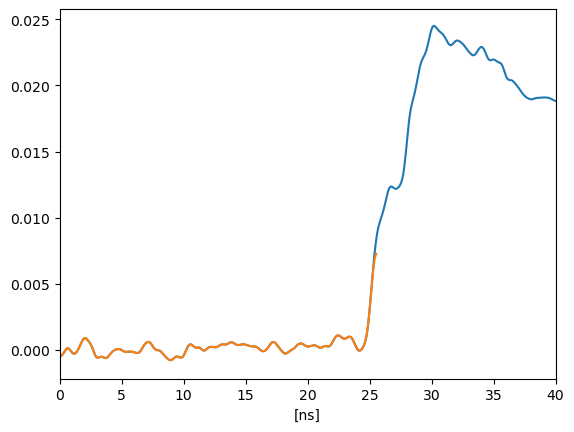

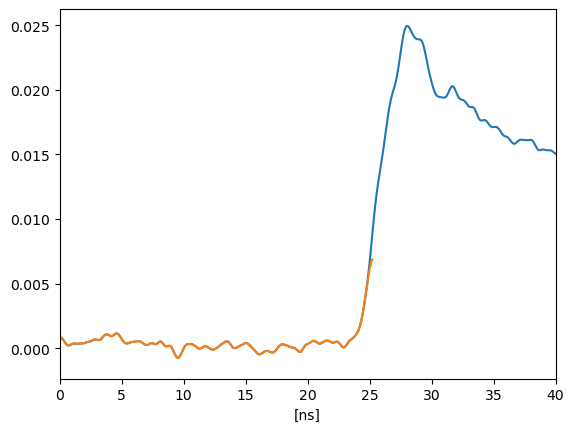

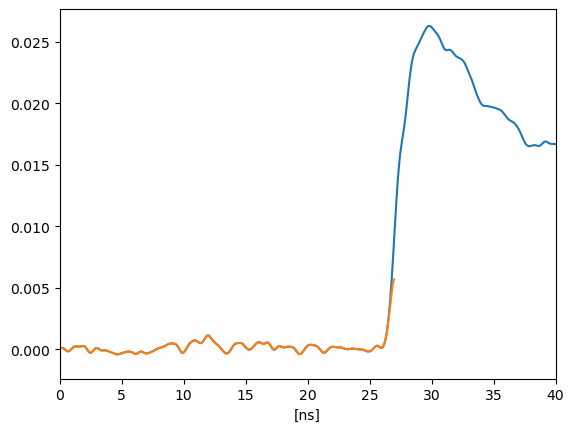

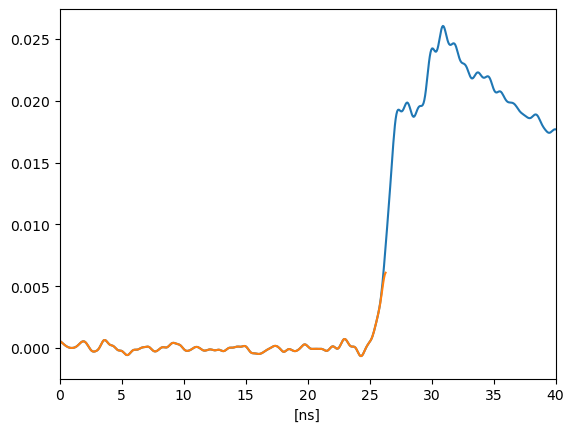

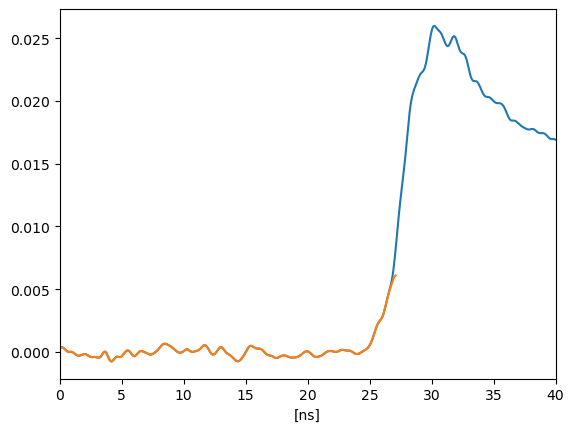

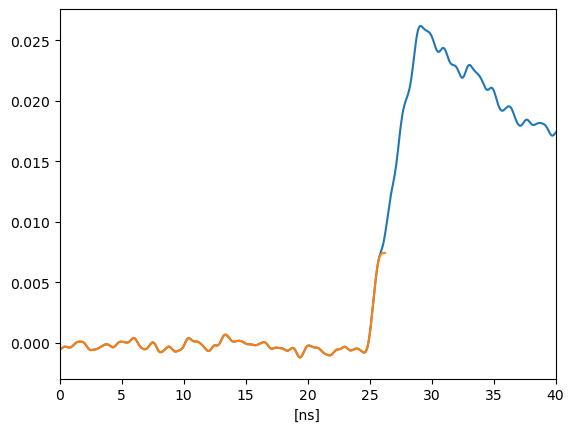

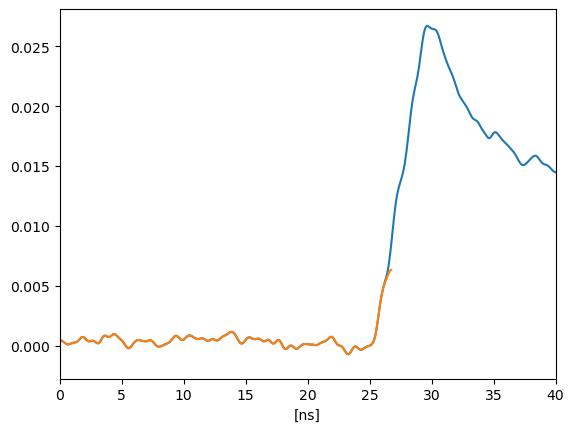

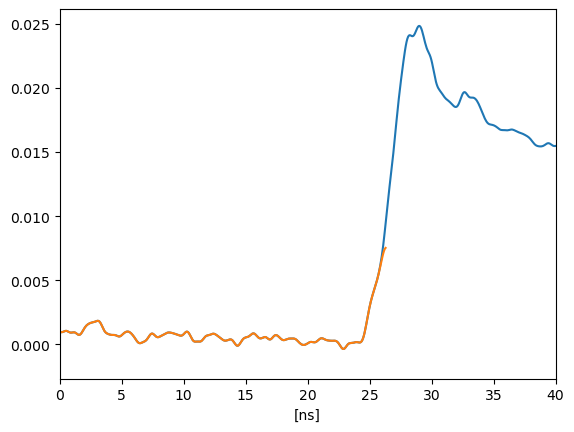

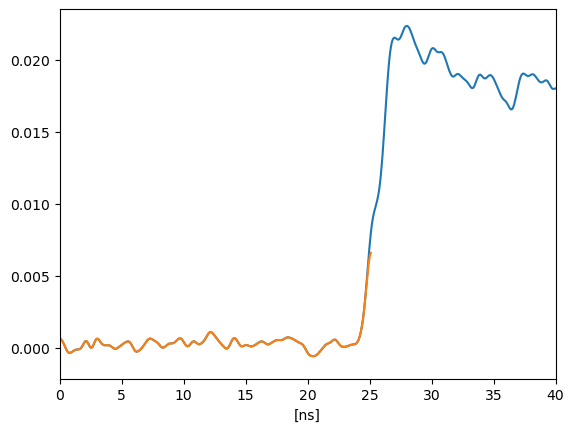

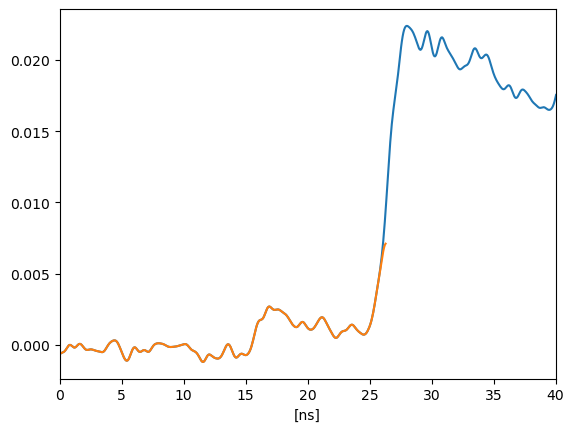

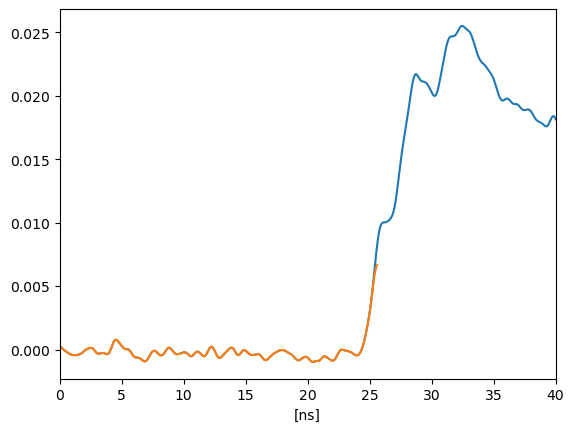

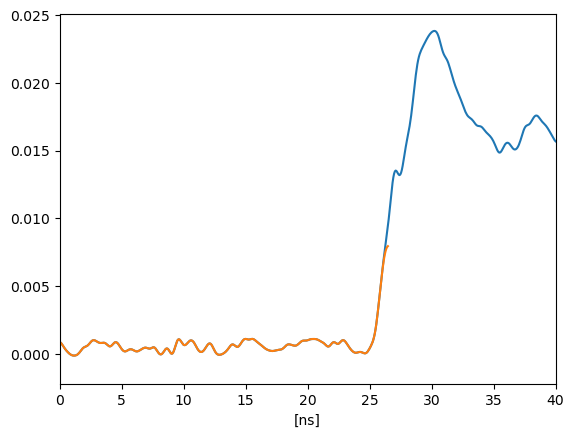

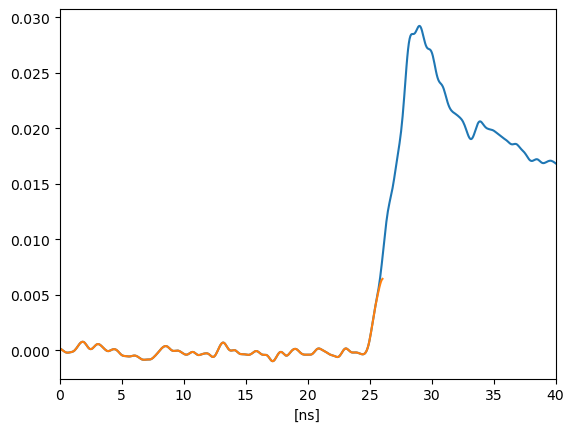

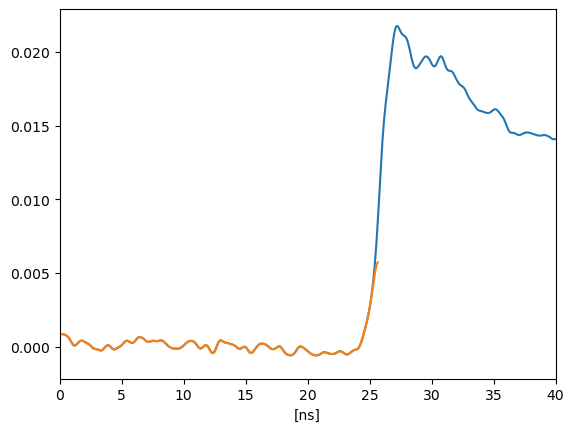

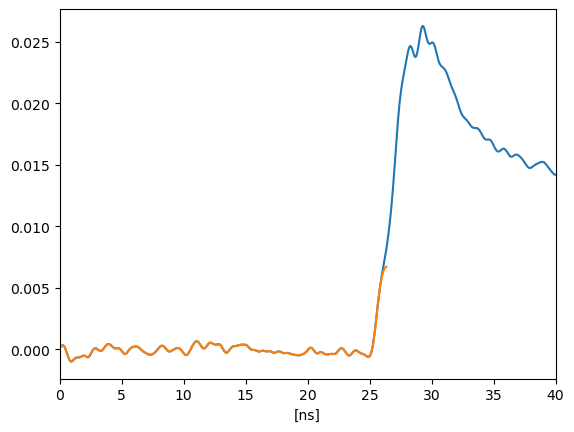

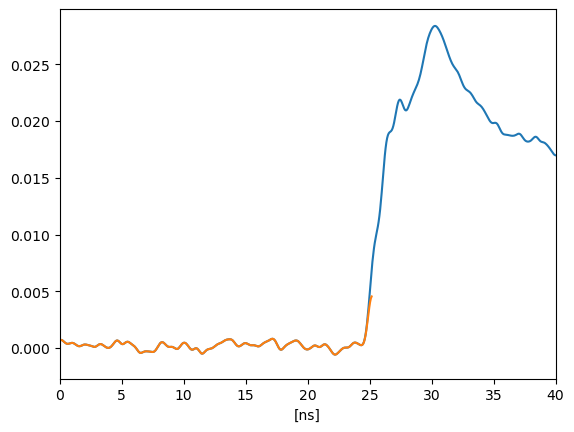

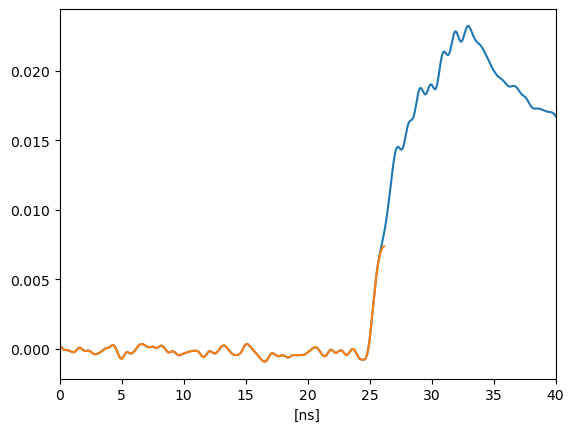

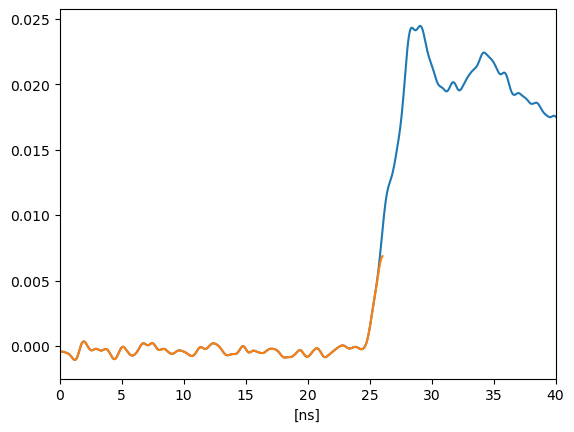

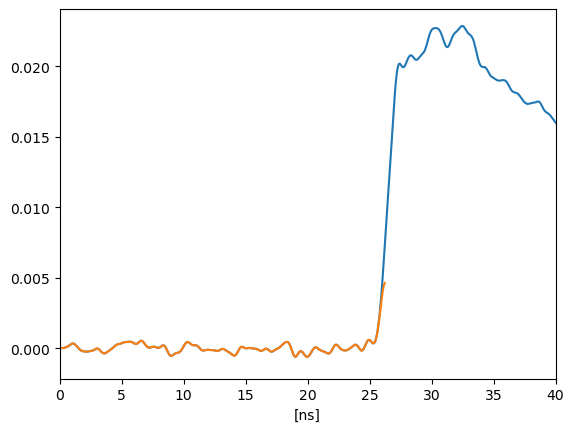

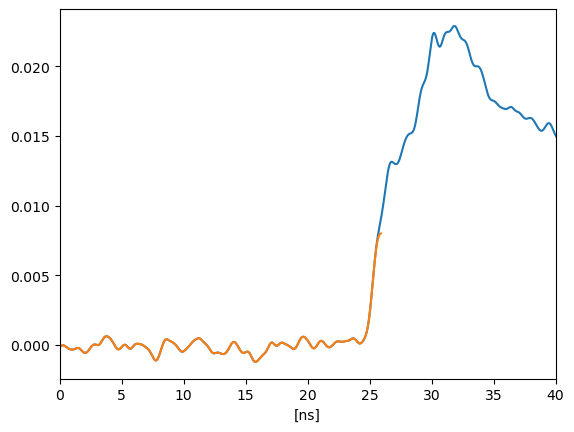

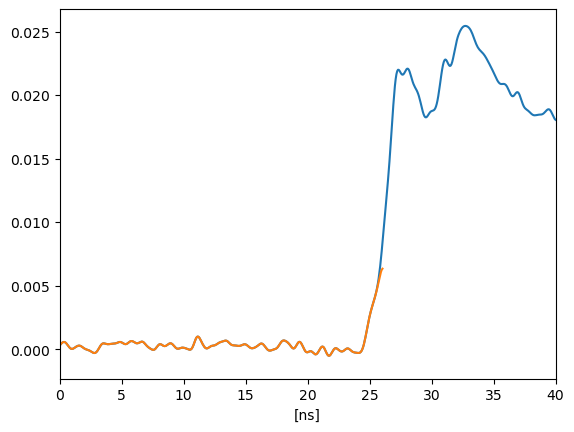

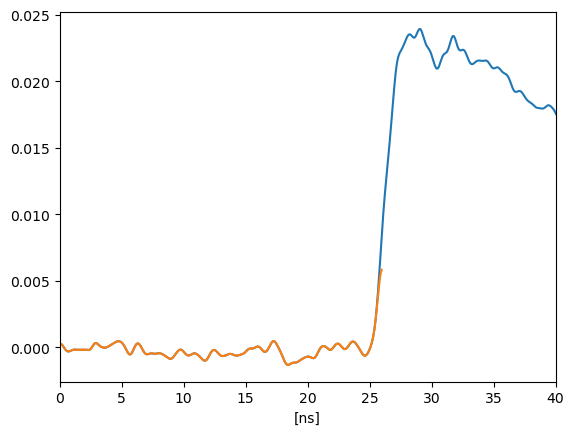

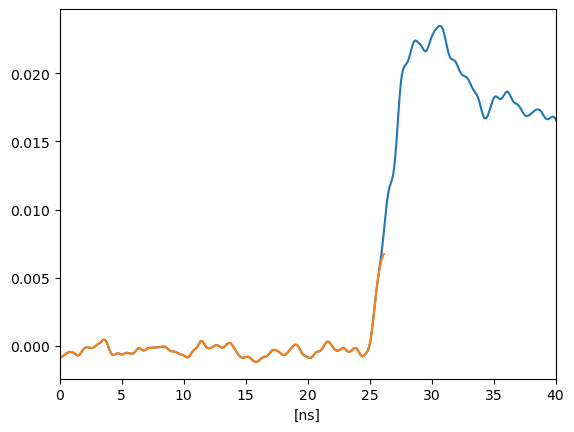

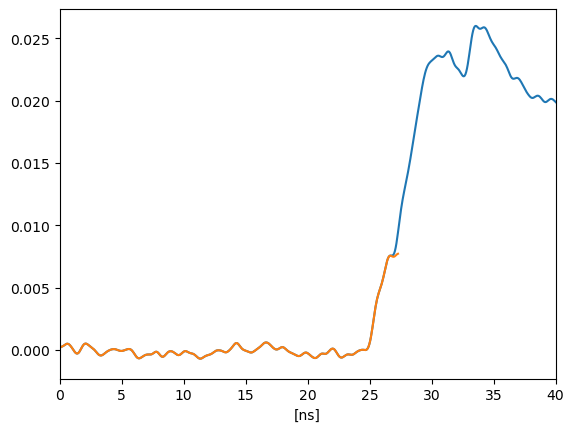

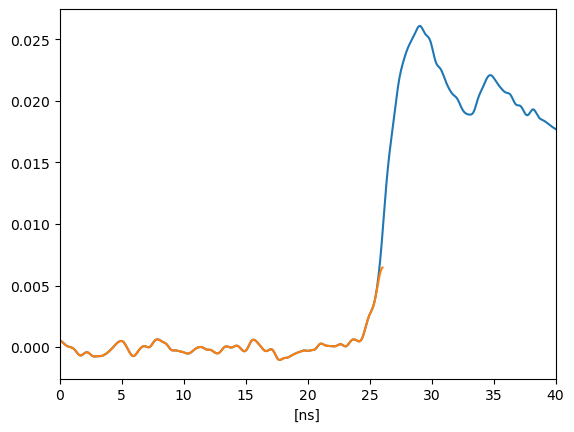

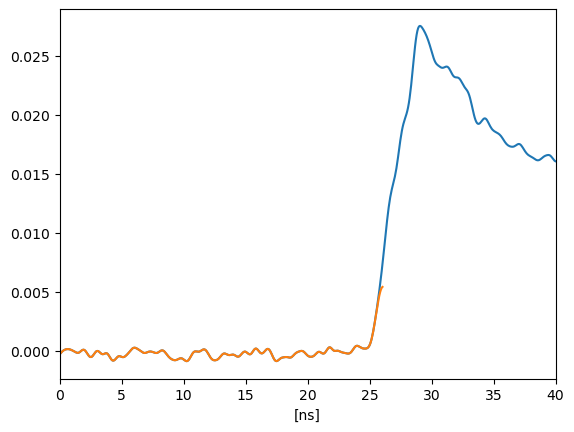

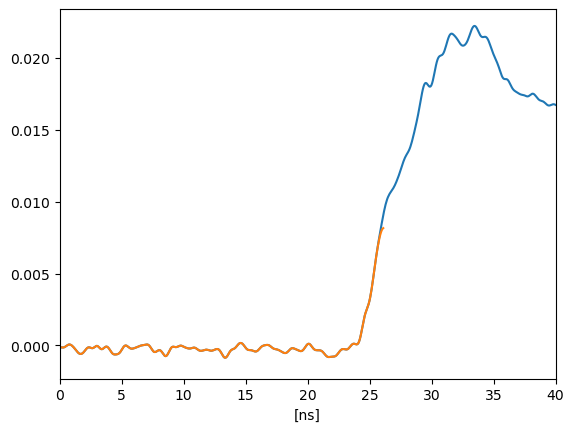

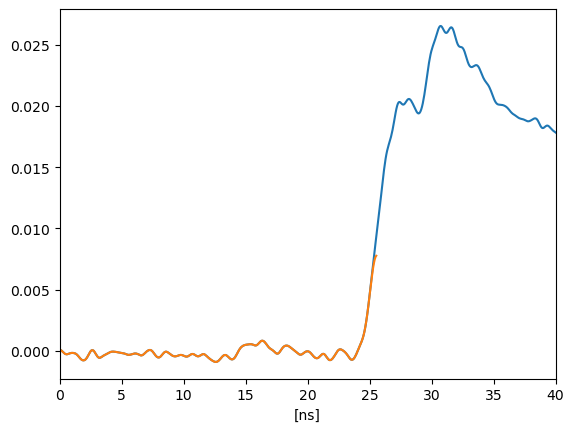

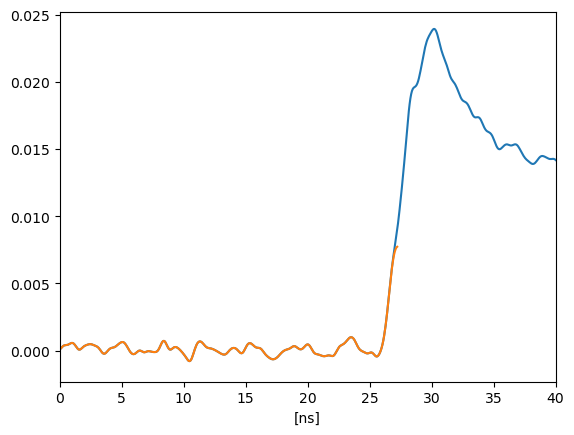

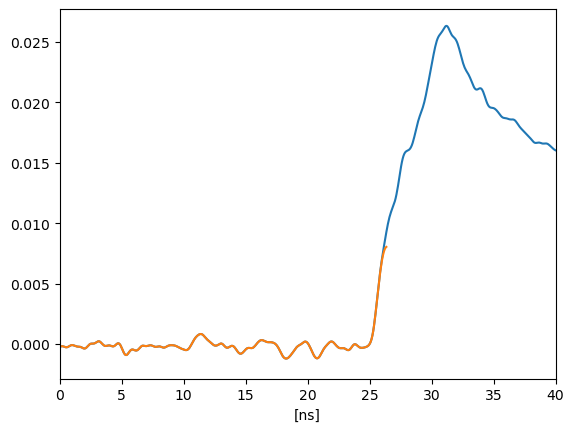

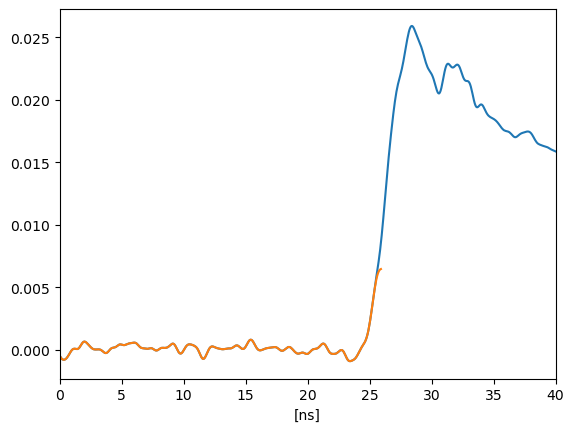

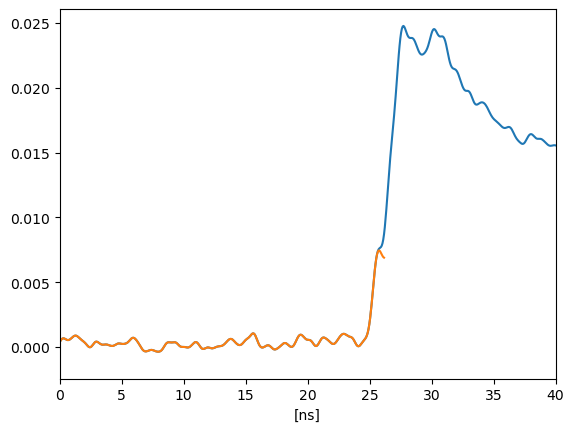

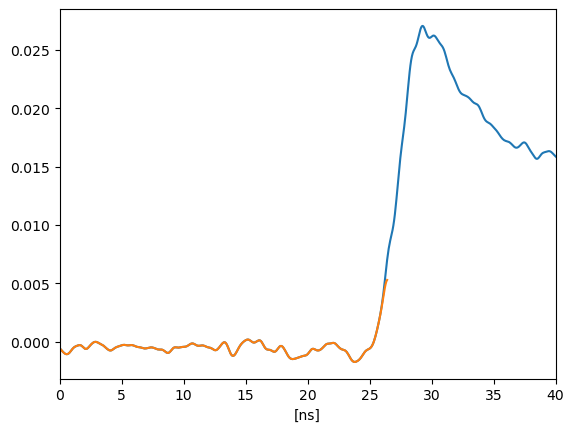

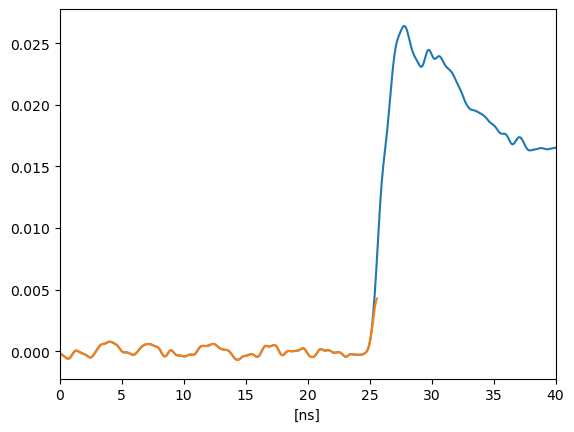

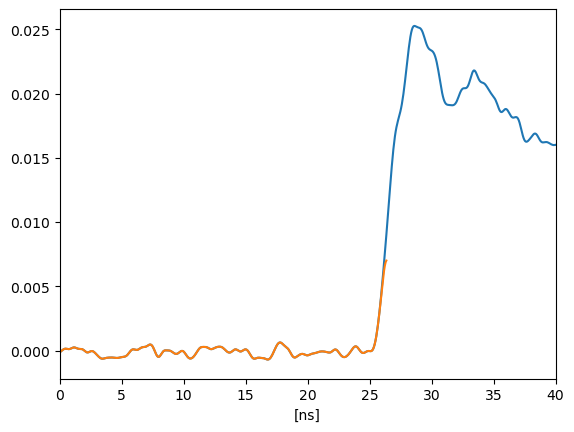

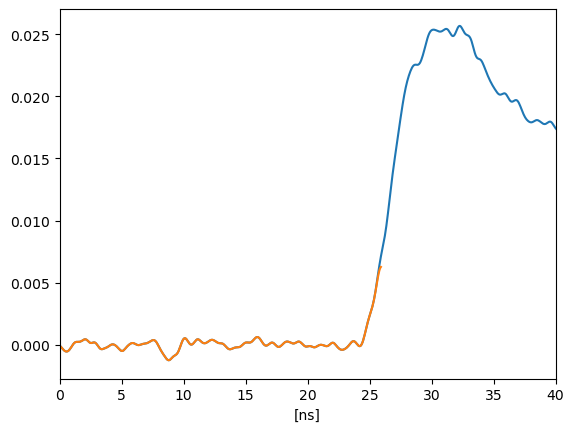

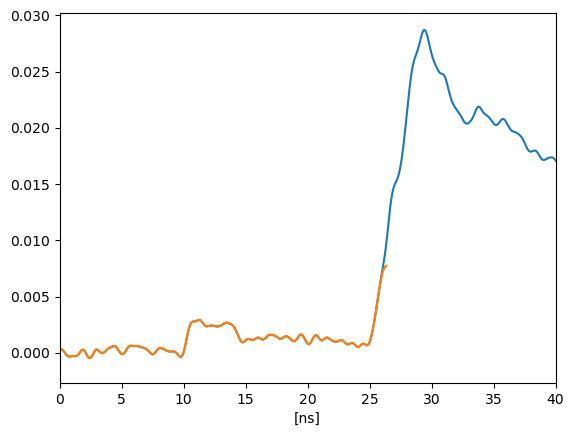

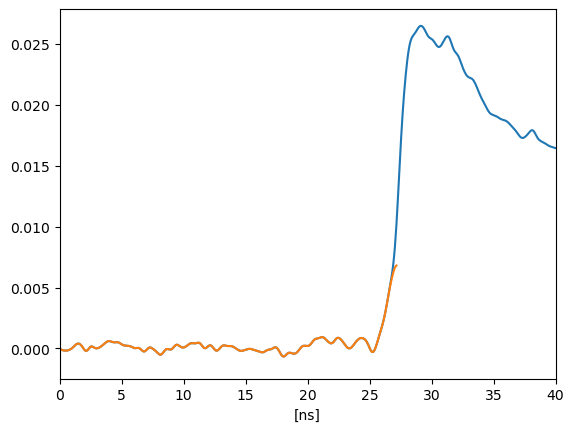

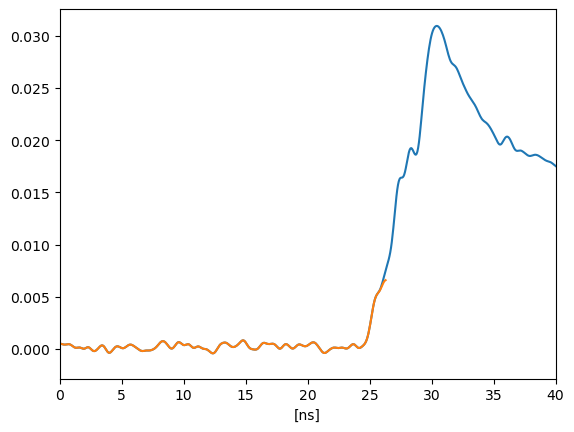

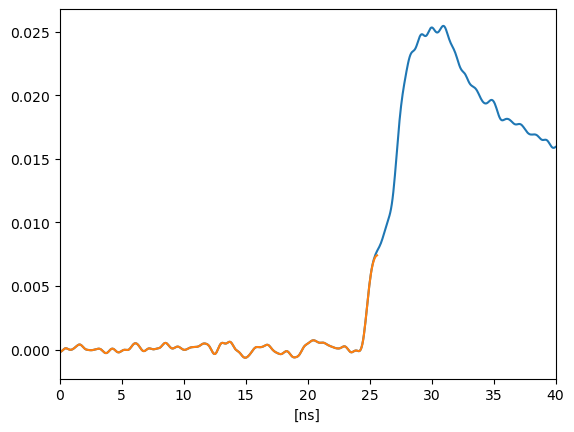

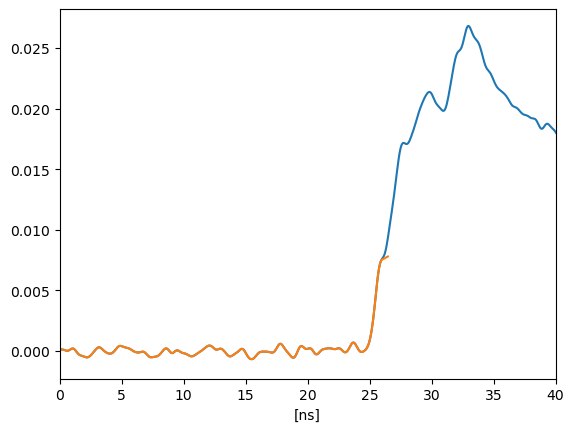

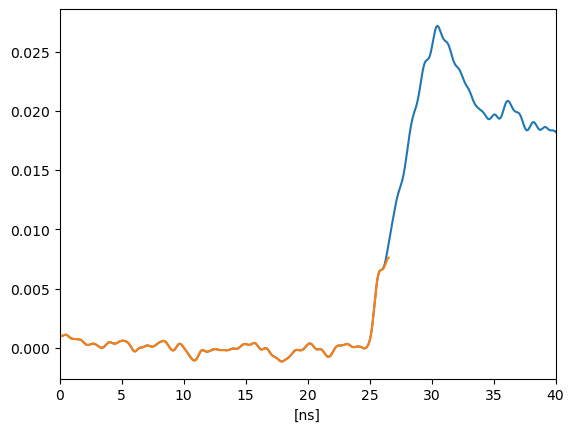

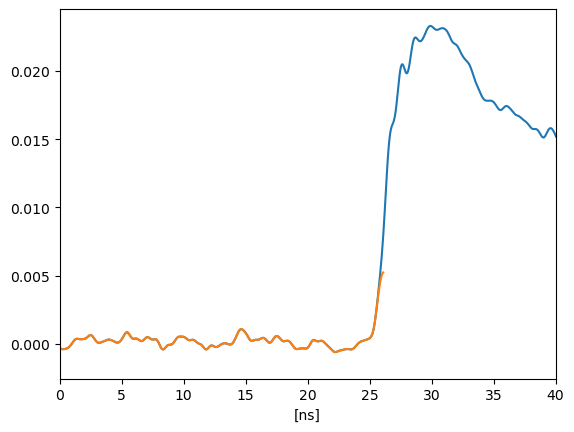

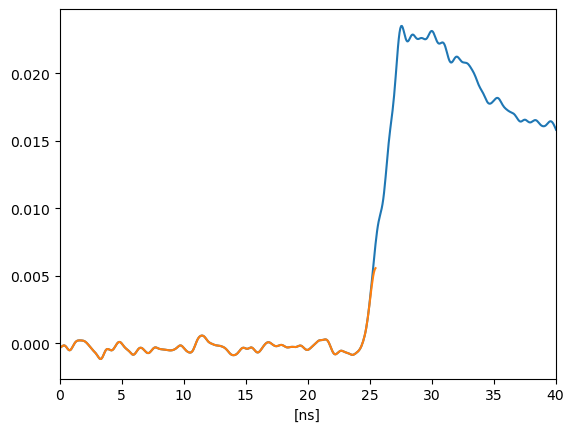

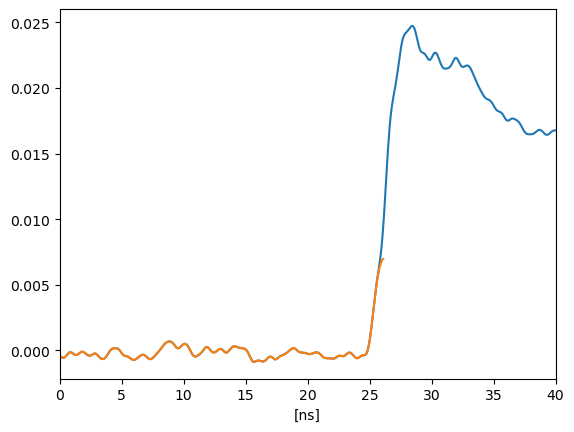

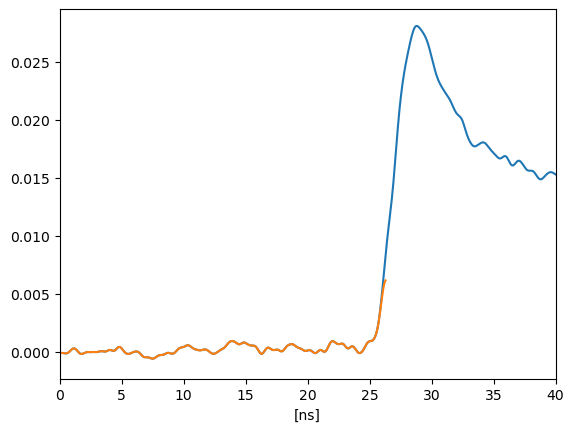

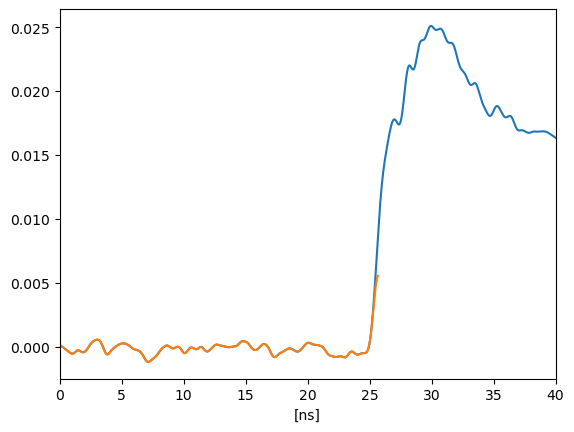

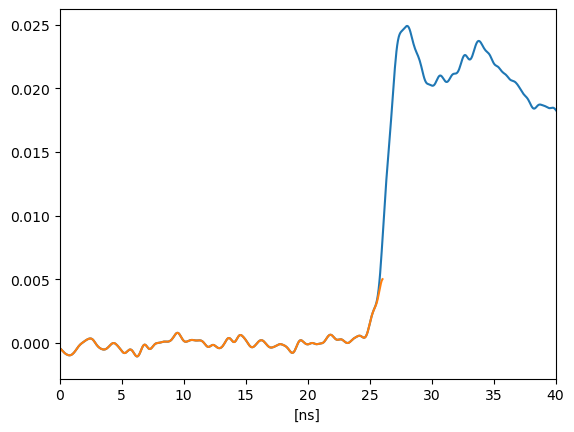

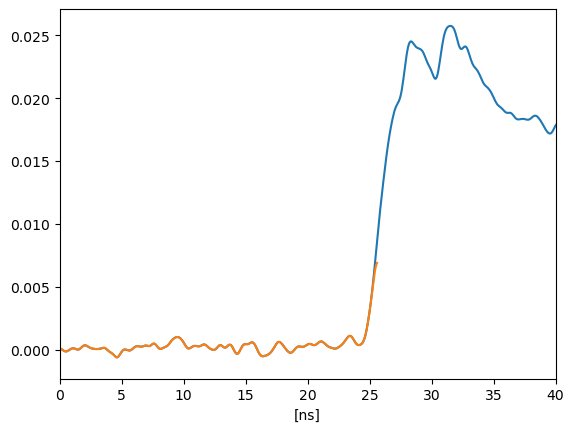

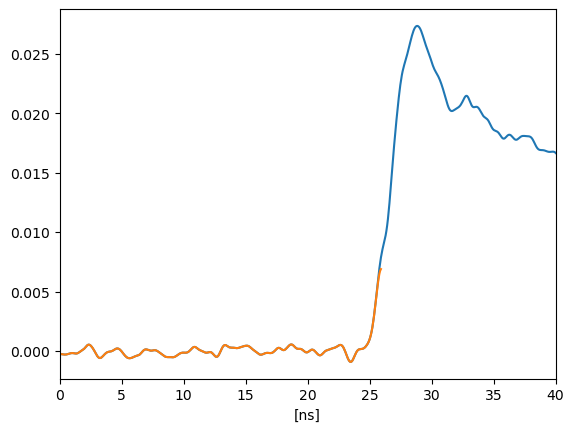

In [52]:
trace_stds=[]
for i in range(len(data_save[1])):
# for i in range(100):
    trace = -data_save[2][i]
    trace-= np.mean(trace[:2048-200])
    trace_stds.append(np.std(trace[:2048-200]))
print(np.mean(trace_stds))


# for i in range(len(data_save[1])):
for i in range(501):
    trace = -data_save[2][i]
    trace-= np.mean(trace[:2048-200])
    # plot(trace[:2000],alpha=0.2)
    
    if np.abs(process_result["amplitude_fit_2"][i] - 0.02)>0.002:
        continue    
        
    trig_pt = np.argmax( trace>trigger_threshold_edge)

    plot(time_series*1e9, scipy.ndimage.gaussian_filter(trace[:],4))
    plot(time_series[:trig_pt]*1e9, scipy.ndimage.gaussian_filter(trace[:trig_pt],4))
    xlabel("[ns]")
    xlim(0,40)
    show()

(-0.005, 0.035)

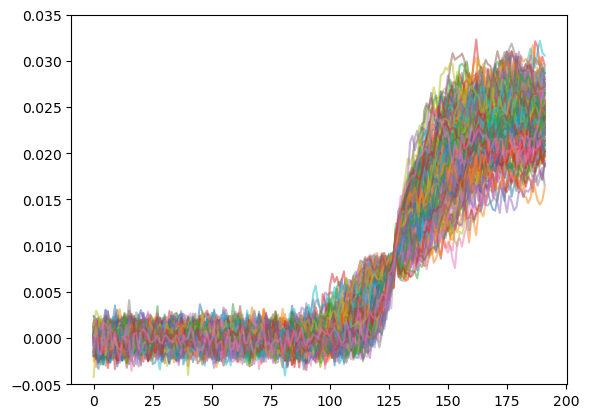

In [56]:
# for i in range(len(data_save[1])):
for i in range(1100):
    trace = -data_save[2][i]
    trace-= np.mean(trace[:2048-200])
    
    if np.abs(process_result["amplitude_fit_2"][i] - 0.02)>0.002:
        continue
        
    trig_pt = np.argmax( trace>trigger_threshold_edge)
    
    tracelet = trace[trig_pt-128:trig_pt+64]
    plot(tracelet, alpha=0.5)
    
ylim(-0.005,0.035)
    # plot(scipy.ndimage.gaussian_filter(tracelet,4))
    

Text(0.5, 0, 'Slope [mV/ns]')

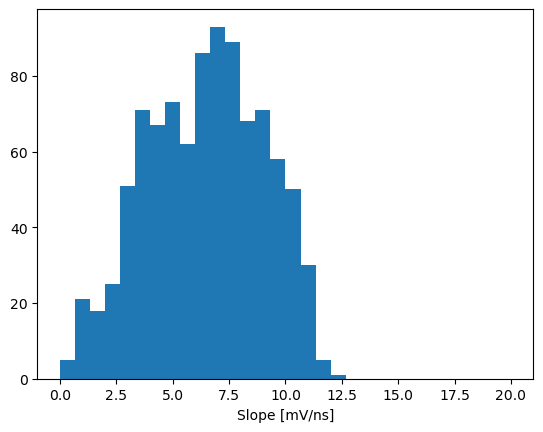

In [176]:
slopes = []

for i in range(len(data_save[1])):
# for i in range(500):
    trace = -data_save[2][i]
    trace-= np.mean(trace[:2048-200])
    
    if np.abs(process_result["amplitude_fit_2"][i] - 0.02)>0.002:
        continue
        
    # trace_ft = scipy.ndimage.gaussian_filter(trace, 32, 1)
    # plot(trace)
    # plot(trace_ft*100)
    # show()
    
    trig_pt = np.argmax( trace>trigger_threshold_edge)
    
    tracelet = trace[trig_pt-16:trig_pt+1]
    time_series = np.arange(len(tracelet))*dt
    slope = hp.slope( tracelet, x = time_series)
    # plot(tracelet)
    # print(slope)
    slopes.append(slope)
    
slopes=np.array(slopes)
hist(slopes*1000, bins=30,range=(0,20))
xlabel("Slope [mV/ns]")

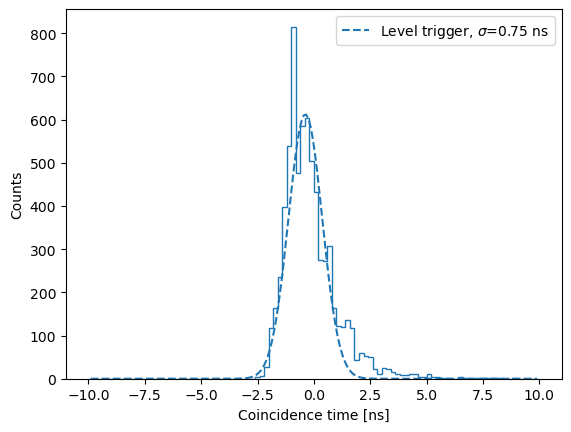

In [177]:
mask = np.abs(process_result["amplitude_fit_2"] - 0.02)<0.02

h1 = hist(process_result[f"trigger_time_edge_2"][mask],bins=100,range=(-10,10),histtype="step")#, label="Level trigger");
# h2 = hist(process_result[f"trigger_time_fit_2"][mask]-25,bins=100,range=(-10,30),histtype="step")#, label="Level trigger");


popt, pcov, info, f = hp.fit_hist("gauss", h1, label="Level trigger, $\sigma$={popt[2]:.2f} ns", color="C0", linestyle="--");
# popt, pcov, info, f = hp.fit_hist("gauss", h2, label="Level trigger, $\sigma$={popt[2]:.2f} ns", color="C0", linestyle="--");


legend()
xlabel("Coincidence time [ns]")
ylabel("Counts")
legend()

In [88]:
# trace_original_avg = np.roll(np.mean(trace_original, axis=0),-16*25)
# # trace_aligned_avg = np.mean(trace_aligned, axis=0)
# plot(time_series, trace_original_avg)
# # plot(time_series, trace_aligned_avg)

# yscale("log")
# xlim(-20,50)
# ylim(1e-5,)
# grid(which="both")
# xlabel("Time [ns]")

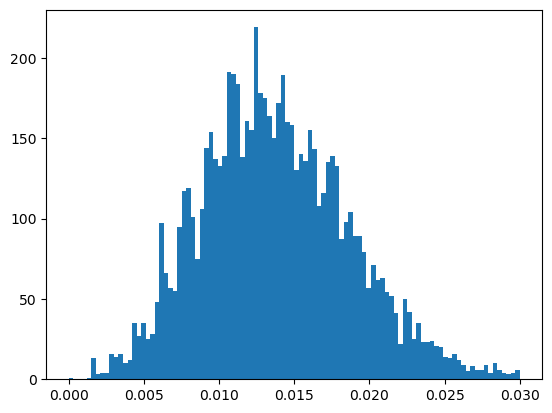

In [178]:
hist(process_result["amplitude_fit_2"],range=(0,0.03), bins=100);

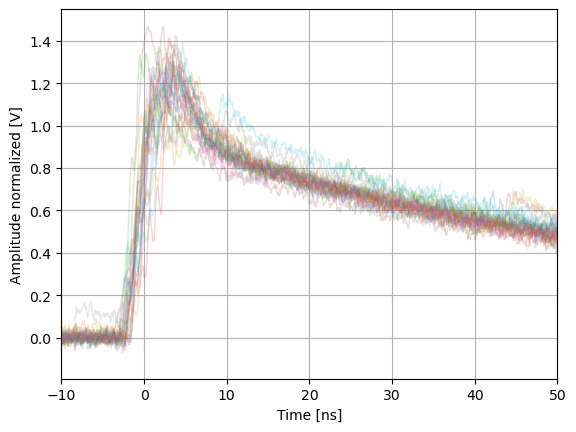

In [180]:
# for i in range(len(data_save[1])):
trace_original = []
trace_aligned = []
trace_amps = []
time_series = data_save["metadata"]["time_series"]*1e9
for i in range(len(data_save[2])):
# for i in range(100):
    trace = -data_save[2][i]
    trace-= np.mean(trace[:2048-200])
    # if (max(trace)>0.025) or  (max(trace)<0.02) or (min(trace)<-0.005):
    #     continue     
    # leading_edges = constant_fraction_discriminator(trace, 0, 0.01, 0.5, gauss_filter=4)
    # trigger_offset = leading_edges[0][1]-2048
    # trigger_offset = np.argmax( y>trigger_threshold_edge)-2048
    
    if np.abs(process_result["amplitude_fit_2"][i] - 0.02)>0.002:
        continue
    
    amp = process_result["amplitude_fit_2"][i]
    trace_amps.append(amp)
    trace/=amp

    # trigger_offset = int(process_result["trigger_time_fit_1"][i]/dt)
    trigger_offset=int(25/dt)
    trace_original.append(trace)
    # trace = np.roll(trace, -trigger_offset)
    trace_aligned.append(trace)
    
    if i <200:
        plot(time_series, trace,alpha=0.2, linewidth=1)

xlim(-10,50)
xlabel("Time [ns]")
ylabel("Amplitude normalized [V]")
grid()

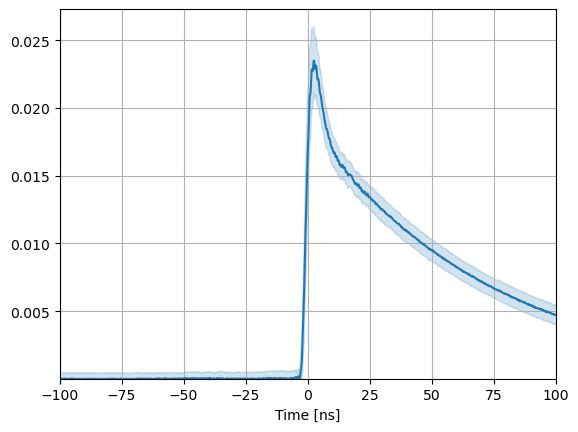

In [181]:
trace_original_avg = np.mean(trace_original, axis=0)
trace_aligned_avg = np.mean(trace_aligned, axis=0)*np.mean(trace_amps)

trace_aligned_std = np.std(trace_aligned, axis=0)*np.mean(trace_amps)

# plot(time_series, trace_original_avg)
plot(time_series, trace_aligned_avg)
fill_between(time_series, trace_aligned_avg-trace_aligned_std, trace_aligned_avg+trace_aligned_std, color="C0", alpha=0.2)

# yscale("log")
xlim(-100,100)
ylim(1e-5,)
grid(which="both")
xlabel("Time [ns]")

laser_pulse_15eh_save = [time_series, trace_aligned_avg, trace_aligned_std]
np.save("laser_pulse_15eh", laser_pulse_15eh_save)

# Get 1 pe pulse shape

In [240]:
# data_save=joblib.load("waveform_laser_low_SiPM2.joblib")
data_save=joblib.load("waveform_laser_low.joblib")
time_series = data_save["metadata"]["time_series"]*1e9

In [285]:
amps = []
trigs = []

for i in tqdm(range(len(data_save[2]))):
# for i in tqdm(range(1000)):
    for ch in [2]:
        x=time_series
        y=-data_save[ch][i]
        y-=np.mean(y[:2000])
        dt = (time_series[1]-time_series[0])
        
        

        # Edge trigger:
        trace_filtered = scipy.ndimage.gaussian_filter(y, 16)
        trigger_time_edge = (np.argmax( trace_filtered>0.001)-2048)*dt
        amplitude = np.max(trace_filtered)
    
        amps.append(amplitude)
        trigs.append(trigger_time_edge)
        
amps=np.array(amps)        
trigs=np.array(trigs)        

100%|████████████████████████████████████████████████████████████████████████████| 7200/7200 [00:02<00:00, 3529.71it/s]


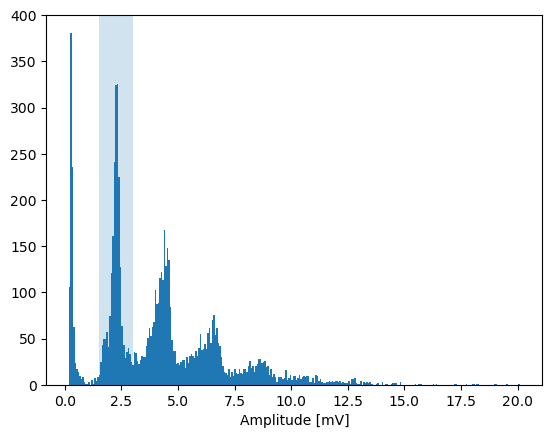

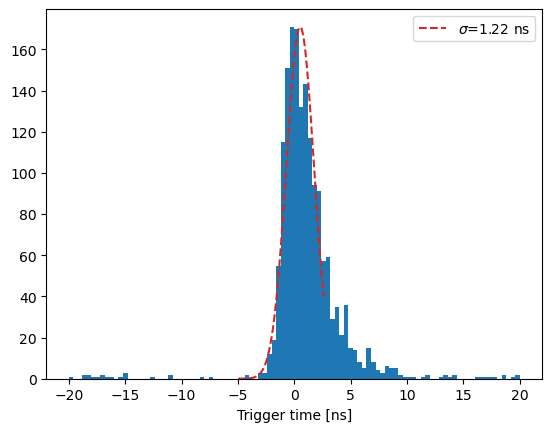

In [286]:
ch=2
hist( amps*1000,bins=300);
axvspan(0.0015*1000,0.003*1000,alpha=0.2)
xlabel("Amplitude [mV]")
show()

h = hist(trigs[mask]-3,bins=100,range=(-20,20));
popt, pcov, info, f = hp.fit_hist("gauss", h, label="$\sigma$={popt[2]:.2f} ns", color="C3", linestyle="--",fit_range=(-5,3));
xlabel("Trigger time [ns]")
legend()

In [ ]:
mask = (amps>0.0015)&(amps<0.003)
# mask = (amps>0.003)&(amps<0.00553)
avg_pulse = -np.mean(np.array(data_save[ch])[mask], axis=0)
avg_pulse-=np.mean(avg_pulse[:2000])

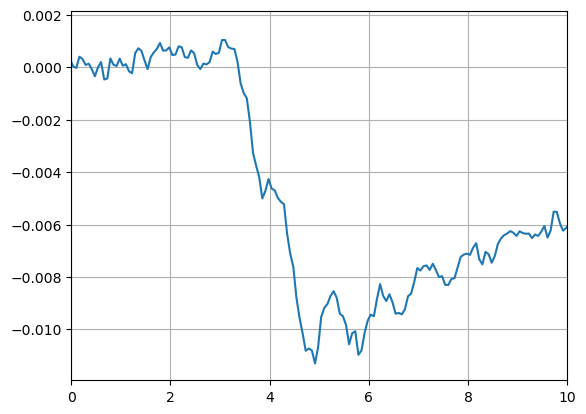

In [290]:
plot(time_series, data_save[ch][11])
xlim(-0,10)
grid()

2.722379518051912,2.72947354287173,77.34649681519237,4.774243607755965,0.007972845669324748,2.297440665624202,0.001490180621672685


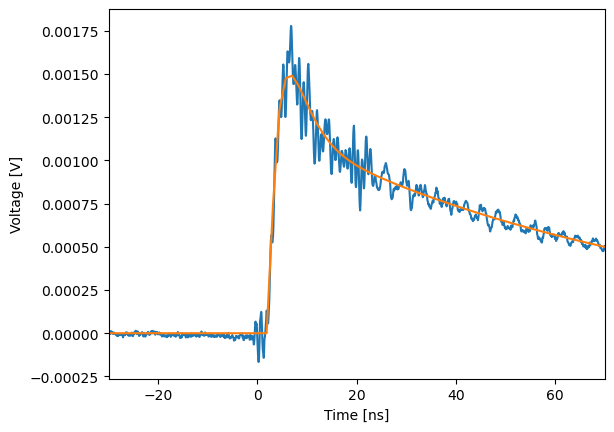

In [308]:
time_series = data_save["metadata"]["time_series"]*1e9
plot(time_series, avg_pulse)

x = time_series
y = avg_pulse
# popt, pcov, info, f = hp.fit_curve(hp.Pulse,x,y, p0=[np.max(y), x[np.argmax(y)], 5., 30], makeplot=True)        
popt, pcov, info, f = hp.fit_curve(hp.Pulse2,x,y, p0=[1.,   2.5, 50,   1, 0.1,    np.max(y), x[np.argmax(y)]], makeplot=True, label="tr:{popt[1]:.1f}ns, tf:{popt[2]:.1f}ns, {popt[3]:.1f}ns")        
# legend()
xlabel("Time [ns]")
ylabel("Voltage [V]")
xlim(-30,70)
# xlim(-3,7)
print(*popt, sep=",")




laser_pulse_1eh_save = [time_series, f(time_series, *popt)]
np.save("laser_pulse_1eh", laser_pulse_1eh_save)

In [309]:
TR_20_80 = time_series[np.argmax(laser_pulse_1eh_save[1]>max(laser_pulse_1eh_save[1])*0.8)] - time_series[np.argmax(laser_pulse_1eh_save[1]>max(laser_pulse_1eh_save[1])*0.2)]
print("Rise time (20%-80%)", TR_20_80)

Rise time (20%-80%) 1.562499999999985


In [ ]:
print(popt, sep=",")


In [244]:
laser_pulse_15eh_save = np.load("laser_pulse_15eh.npy")
time_series, laser_pulse_15eh, laser_pulse_15eh_std = laser_pulse_15eh_save

scintillator_pulse_15eh_save = np.load("scintillator_pulse_15eh.npy")
time_series, scintillator_pulse_15eh, scintillator_pulse_15eh_std = scintillator_pulse_15eh_save

laser_pulse_1eh_save = np.load("laser_pulse_1eh.npy")
time_series, laser_pulse_1eh = laser_pulse_1eh_save


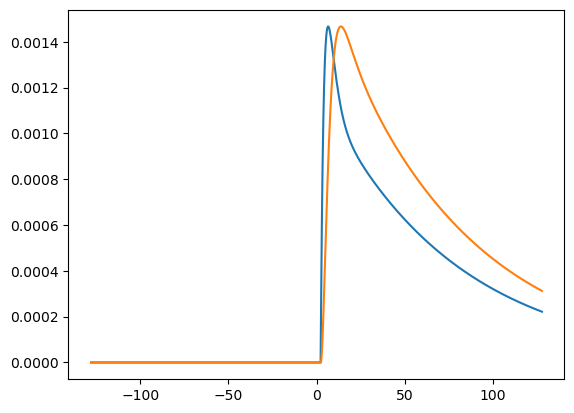

In [245]:
decay_kernel = scipy.stats.expon.pdf(time_series, scale=5.)
laser_smeared = scipy.signal.convolve(decay_kernel, laser_pulse_1eh, mode="same")
laser_smeared = laser_smeared/max(laser_smeared)*max(laser_pulse_1eh)

# plot(time_series,decay_kernel)
plot(time_series,laser_pulse_1eh)
plot(time_series, laser_smeared)

In [246]:
recovered, remainder = scipy.signal.deconvolve(scintillator_pulse_15eh, laser_pulse_15eh)

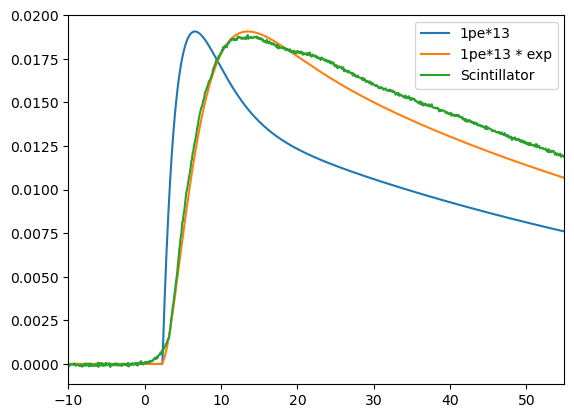

In [291]:
# plot(time_series+3.2, laser_pulse_15eh, label="16 pe")
plot(time_series, laser_pulse_1eh*13, label="1pe*13")
plot(time_series-0.3, laser_smeared*13, label="1pe*13 * exp")

plot(time_series+3.2, scintillator_pulse_15eh, label="Scintillator")

xlim(-10,55)
# ylim(0.0001)
# yscale("log")
legend()

(-10.0, 20.0)

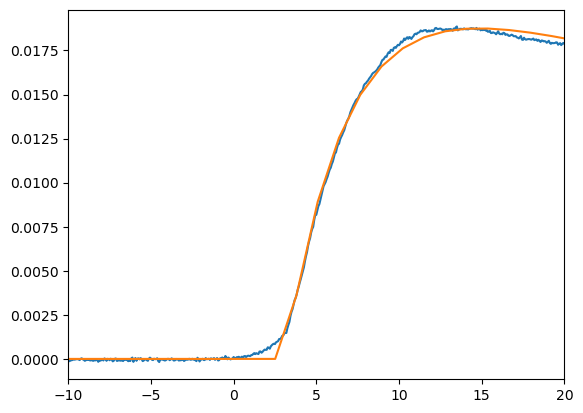

In [299]:
plot(time_series+3.2, scintillator_pulse_15eh, label="Scintillator")


x=time_series+3.2
y=scintillator_pulse_15eh
popt, pcov, info, f = hp.fit_curve(hp.Pulse,x,y, p0=[np.max(y), x[np.argmax(y)], 5., 30], makeplot=True)   
xlim(-10,20)

In [300]:
print(popt)

[1.87422408e-02 3.12961190e+00 3.62521892e+00 7.84189592e+01]
